In [1]:
install.packages('dtangle')

also installing the dependency ‘DEoptimR’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library('dtangle')
X = shen_orr_ex$data$log
y = shen_orr_ex$anno$mixture[,1]
df = data.frame(cbind(y,X))

In [3]:
head(X)

,X1367566_at,X1367568_a_at,X1367570_at,X1367584_at,X1367614_at,X1367647_at,X1367661_at,X1367664_at,X1367804_at,X1367816_at,⋯,X1398282_at,X1398318_at,X1398357_at,X1398368_at,X1398514_at,X1398577_at,X1398578_at,X1398625_at,X1398634_at,X1398716_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM495209,3.396192,7.685769,5.722330,6.628653,6.659618,12.737089,5.163315,3.101658,11.459725,4.819886,⋯,10.524515,4.401075,3.327705,4.043979,10.773481,12.232607,3.410767,2.587550,10.230386,2.275608
GSM495210,2.882626,7.759002,6.005583,6.771917,6.655919,12.755694,5.491298,3.095527,11.439763,4.708422,⋯,10.548672,3.953334,3.605773,3.779552,10.819626,12.097947,3.605773,2.429901,10.233172,1.937317
GSM495211,3.072980,7.598871,5.741630,6.564820,6.741483,12.725779,5.291097,2.864352,11.425470,4.753807,⋯,10.536997,4.766228,3.657362,4.435827,10.861409,12.218917,3.309184,2.611046,10.202474,1.919408
GSM495212,3.168440,7.209959,6.396841,7.040779,5.282323,6.056859,4.714119,2.349998,4.009121,8.512256,⋯,3.577845,3.825272,11.283218,9.241972,2.816389,4.849044,10.391058,10.849582,2.787449,7.923482
GSM495213,3.087147,7.321854,6.483467,7.054886,5.469455,6.045071,4.713800,2.570193,4.100364,8.640070,⋯,3.529783,3.634708,11.322901,9.206841,2.836462,4.920250,10.263996,10.778257,2.581674,8.127655
GSM495214,2.768613,7.277230,6.747241,7.079465,5.277774,5.821334,4.967451,2.819242,4.110803,8.554801,⋯,3.700635,3.726439,11.288997,9.229028,2.599532,5.177272,10.423879,10.999074,2.230049,8.029409


In [4]:
tail(y)

GSM495245 GSM495246 GSM495247 GSM495248 GSM495249 GSM495250 
     0.60      0.60      0.60      0.65      0.65      0.65

In [5]:
dim(X)

[1]  42 600

In [6]:
sigma = apply(X,2,sd)
mus = colMeans(X)
X = scale(X,scale=TRUE,center=TRUE)
head(X)

,X1367566_at,X1367568_a_at,X1367570_at,X1367584_at,X1367614_at,X1367647_at,X1367661_at,X1367664_at,X1367804_at,X1367816_at,⋯,X1398282_at,X1398318_at,X1398357_at,X1398368_at,X1398514_at,X1398577_at,X1398578_at,X1398625_at,X1398634_at,X1398716_at
GSM495209,-2.241605,-1.303094,-1.5854084,-1.419601,-1.168871,0.5502482,-1.717146,-1.024258,0.7230155,-2.7013675,⋯,0.8981559,-1.365106,-2.4346966,-1.867163,0.8367154,0.6500503,-2.1594806,-2.4526181,0.8954470,-2.026491
GSM495210,-2.395904,-1.253267,-1.3785606,-1.314790,-1.170999,0.5583373,-1.559126,-1.027932,0.7154814,-2.7656655,⋯,0.9087914,-1.605293,-2.3181825,-2.014751,0.8555995,0.5930459,-2.0734398,-2.5145985,0.8965648,-2.207253
GSM495211,-2.338713,-1.362218,-1.5713145,-1.466300,-1.121784,0.5453305,-1.655581,-1.166471,0.7100872,-2.7394851,⋯,0.9036514,-1.169224,-2.2965658,-1.648456,0.8726982,0.6442549,-2.2043009,-2.4433808,0.8842477,-2.216822
GSM495212,-2.310032,-1.626830,-1.0928420,-1.118093,-1.961073,-2.3543256,-1.933564,-1.474713,-2.0888833,-0.5714284,⋯,-2.1601859,-1.673990,0.8987718,1.034053,-2.4195660,-2.4755463,0.9203732,0.7956237,-2.0909269,0.991379
GSM495213,-2.334456,-1.550697,-1.0295825,-1.107772,-1.853436,-2.3594507,-1.933717,-1.342755,-2.0544476,-0.4976988,⋯,-2.1813458,-1.776217,0.9153997,1.014445,-2.4113518,-2.4454038,0.8643109,0.7675823,-2.1734916,1.100476
GSM495214,-2.430159,-1.581059,-0.8369597,-1.089791,-1.963689,-2.4567319,-1.811511,-1.193504,-2.0505080,-0.5468865,⋯,-2.1061265,-1.727008,0.9011932,1.026828,-2.5083104,-2.3366018,0.9348544,0.8543971,-2.3145761,1.047980


In [7]:
head(colMeans(X))

X1367566_at X1367568_a_at   X1367570_at   X1367584_at   X1367614_at 
-4.295506e-17 -1.766733e-16  1.149874e-16 -2.438526e-16 -6.838734e-17 
  X1367647_at 
 3.105981e-16

In [8]:
head(apply(X,2,sd))

X1367566_at X1367568_a_at   X1367570_at   X1367584_at   X1367614_at 
            1             1             1             1             1 
  X1367647_at 
            1

### use regression!?

In [9]:
lmod = lm(y~X)
lmod


Call:
lm(formula = y ~ X)

Coefficients:
   (Intercept)    XX1367566_at  XX1367568_a_at    XX1367570_at    XX1367584_at  
      0.464286        0.224711       -0.423476        0.102430        0.016009  
  XX1367614_at    XX1367647_at    XX1367661_at    XX1367664_at    XX1367804_at  
     -0.061155        0.818988        0.290585        0.060679        0.458833  
  XX1367816_at    XX1367838_at    XX1367845_at    XX1367846_at    XX1367851_at  
     -0.363521       -0.342555       -0.439694        0.059366        1.365288  
  XX1367871_at    XX1367917_at    XX1367918_at    XX1367930_at    XX1367977_at  
     -0.404093        0.596579        0.500478        1.854884       -0.865878  
  XX1367988_at    XX1367992_at    XX1368034_at    XX1368044_at    XX1368048_at  
     -0.761417       -1.261664       -0.477547        0.341214        1.832175  
  XX1368052_at    XX1368077_at    XX1368093_at  XX1368097_a_at    XX1368114_at  
     -0.005602       -0.054478       -0.226036       -0.514050     

In [10]:
X_design = model.matrix(lmod)
kappa(t(X_design)%*%X_design)

[1] 9.093109e+20

In [11]:
install.packages('pls')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
library('pls')


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [13]:
?pcr

mvr {pls},R Documentation
formula,a model formula. Most of the lm formula constructs are supported. See below.
ncomp,the number of components to include in the model (see below).
Y.add,a vector or matrix of additional responses containing relevant information about the observations. Only used for cppls.
data,an optional data frame with the data to fit the model from.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain missing values. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful. See na.omit for other alternatives."
method,"the multivariate regression method to be used. If ""model.frame"", the model frame is returned."
scale,"numeric vector, or logical. If numeric vector, X is scaled by dividing each variable with the corresponding element of scale. If scale is TRUE, X is scaled by dividing each variable by its sample standard deviation. If cross-validation is selected, scaling by the standard deviation is done for every segment."
center,"logical, determines if the X and Y matrices are mean centered or not. Default is to perform mean centering."
validation,character. What kind of (internal) validation to use. See below.


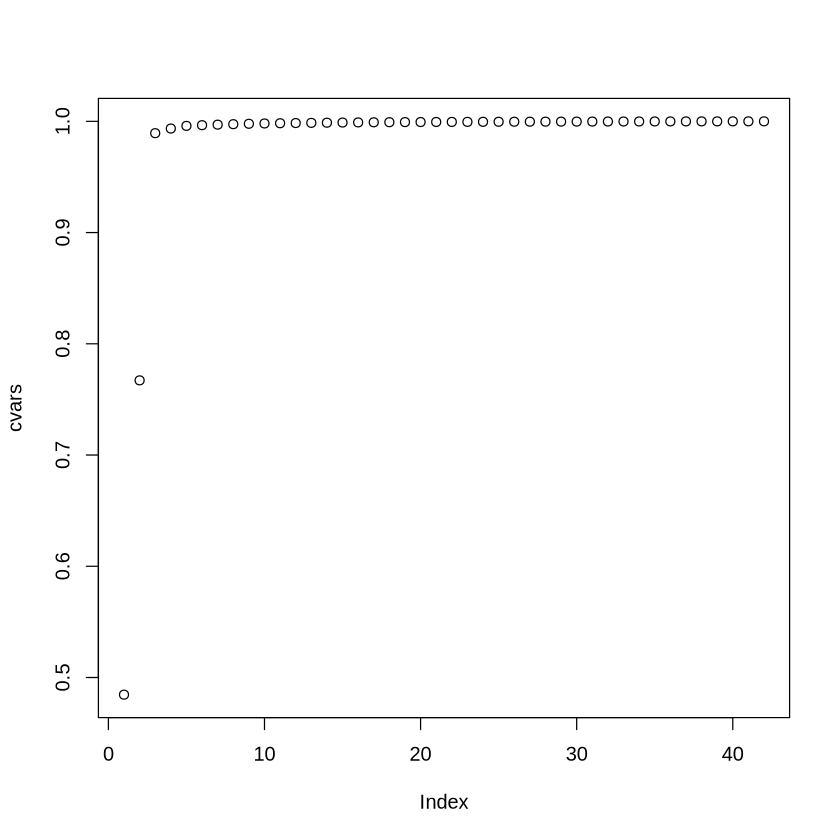

In [14]:
vars = svd(X)$d^2
cvars = cumsum(vars/sum(vars))
plot(cvars)

In [15]:
which.max(cvars>.8)

[1] 3

In [16]:
pcrmod = pcr(y~X,ncomp=3)

In [17]:
summary(pcrmod)

Data: 	X dimension: 42 600 
	Y dimension: 42 1
Fit method: svdpc
Number of components considered: 3
TRAINING: % variance explained
   1 comps  2 comps  3 comps
X    48.46    76.71    98.94
y    22.01    94.47    95.61


In [18]:
pcr_preds = predict(pcrmod,ncomp=3)

In [19]:
head(pcr_preds)

, , 3 comps

                    y
GSM495209  1.03466810
GSM495210  1.03413871
GSM495211  1.03140140
GSM495212 -0.07176483
GSM495213 -0.06797601
GSM495214 -0.07435085

## coding it by hand

In [20]:
V = svd(X,nv=3)$v

In [21]:
Z = X%*%V

In [22]:
head(Z)

GSM495209,-1.875851,-27.38257,27.63546
GSM495210,-1.848059,-27.30056,27.93123
GSM495211,-1.927673,-27.25579,27.45102
GSM495212,5.133557,33.59908,19.43493
GSM495213,5.418790,33.50248,19.33677
GSM495214,5.321305,33.81241,19.40643


In [23]:
dim(Z)

[1] 42  3

In [28]:
hm = lm(y~Z)

In [29]:
summary(hm)


Call:
lm(formula = y ~ Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16109 -0.03345  0.00637  0.03136  0.08491 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4642857  0.0095974  48.376  < 2e-16 ***
Z1           0.0078659  0.0005697  13.807  < 2e-16 ***
Z2          -0.0186910  0.0007460 -25.054  < 2e-16 ***
Z3           0.0026535  0.0008412   3.154  0.00314 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0622 on 38 degrees of freedom
Multiple R-squared:  0.9561,	Adjusted R-squared:  0.9527 
F-statistic: 276.1 on 3 and 38 DF,  p-value: < 2.2e-16


In [30]:
head(coef(hm))

(Intercept)           Z1           Z2           Z3 
 0.464285714  0.007865880 -0.018691001  0.002653472

In [31]:
hm_preds = predict(hm)

In [32]:
head(cbind(pcr_preds,hm_preds))

,pcr_preds,hm_preds
GSM495209,1.03466810,1.03466810
GSM495210,1.03413871,1.03413871
GSM495211,1.03140140,1.03140140
GSM495212,-0.07176483,-0.07176483
GSM495213,-0.06797601,-0.06797601
GSM495214,-0.07435085,-0.07435085


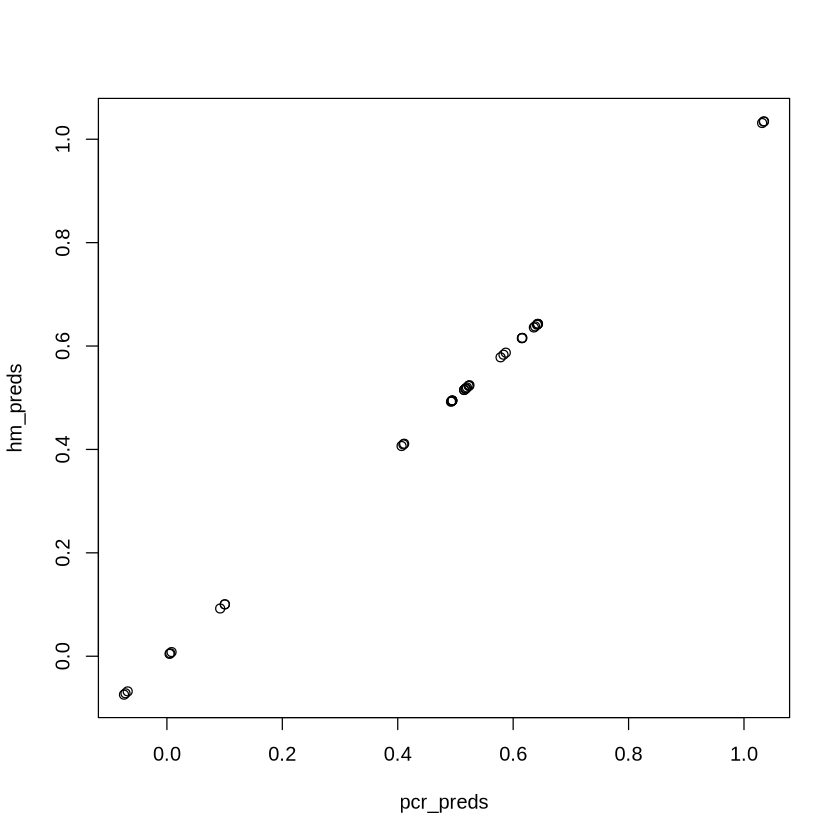

In [33]:
plot(pcr_preds,hm_preds)

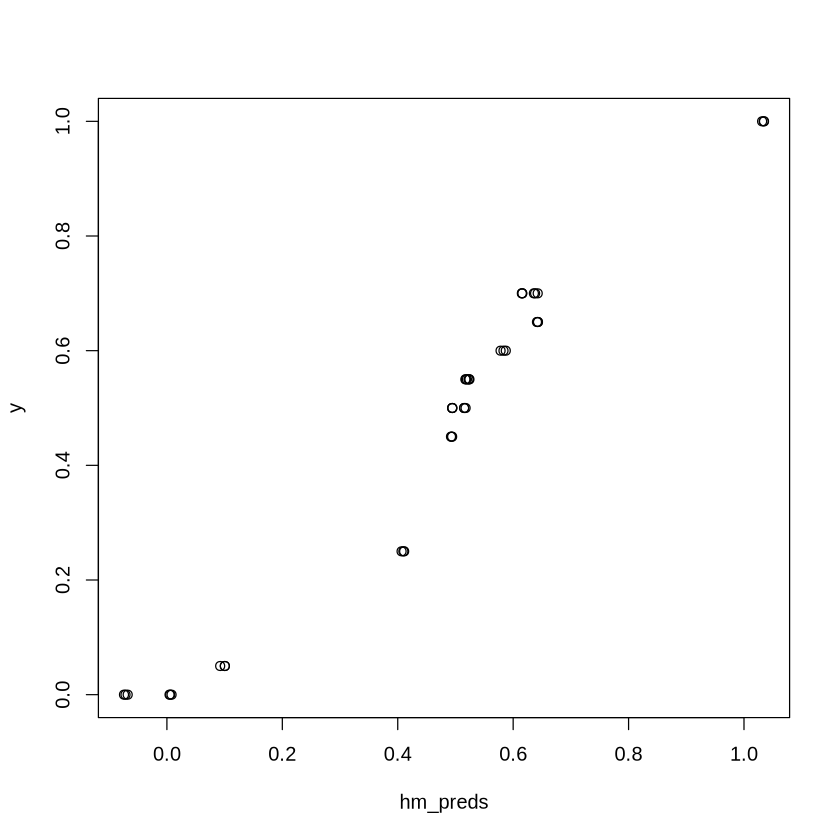

In [35]:
plot(hm_preds,y)